In [36]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

m =0.7
c = 0.3
x = torch.arange(0,1,0.02)
y = m*x + c

print("Shape of x = ", x.shape)
print("Shape of y = ", y.shape)


Shape of x =  torch.Size([50])
Shape of y =  torch.Size([50])


In [37]:
if torch.cuda.is_available():
  device = "cuda"
elif torch.backends.mps.is_available():
  device = "mps"
else:
  device = "cpu"
print(f"using device: {device}")

using device: cpu


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [39]:
def plot_data(X_train, Y_train, X_test, Y_test, predictions=None):
    plt.figure(figsize=(10,6))
    plt.scatter(X_train, Y_train, c="red", s=8, label="Training Data")
    plt.scatter(X_test, Y_test, c="blue", s=8, label="Testing Data")
    if predictions is not None:
        plt.scatter(X_test, predictions, c="green", s=8, label="Predicted Data")
    plt.legend()
    plt.show()

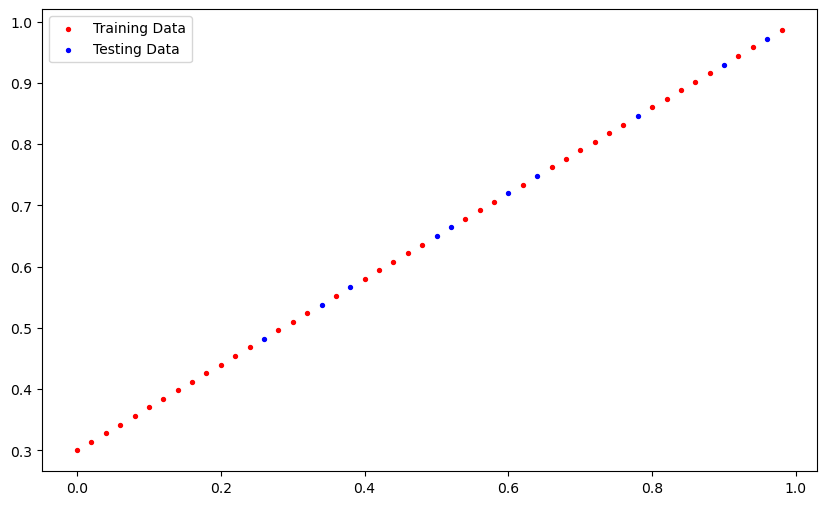

In [40]:
plot_data(X_train, Y_train, X_test, Y_test)

In [41]:
class MyFirstNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

  def forward(self, x):
    return self.weights*x + self.bias

  # def loss_func(y_true, y_preds):
  #   return np.sum(np.square(y_true - y_preds))/len(y_true)



In [42]:
torch.manual_seed(42)
model = MyFirstNeuralNetwork()
list(model.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

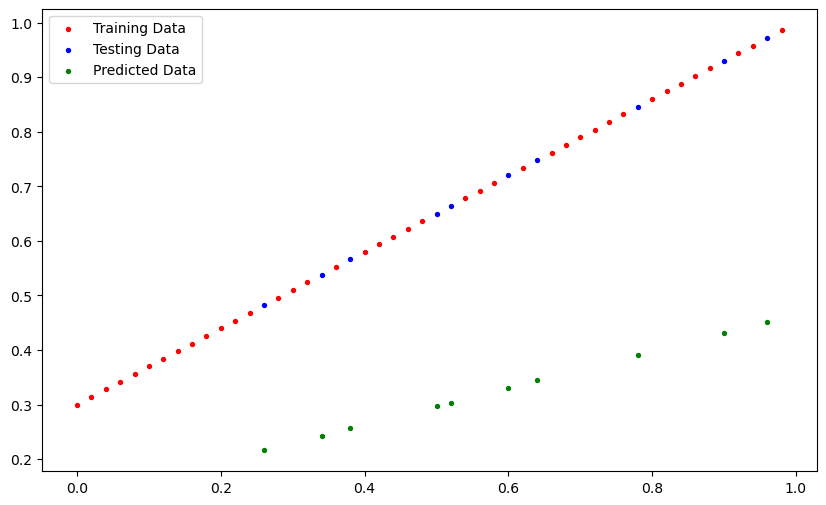

In [43]:
with torch.inference_mode():
  y_preds = model(X_test)
plot_data(X_train, Y_train, X_test, Y_test, predictions=y_preds)

In [44]:
# set loss and optimizzer

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1 ) # lr = learning rate

In [49]:
~


SyntaxError: invalid syntax (464334863.py, line 1)

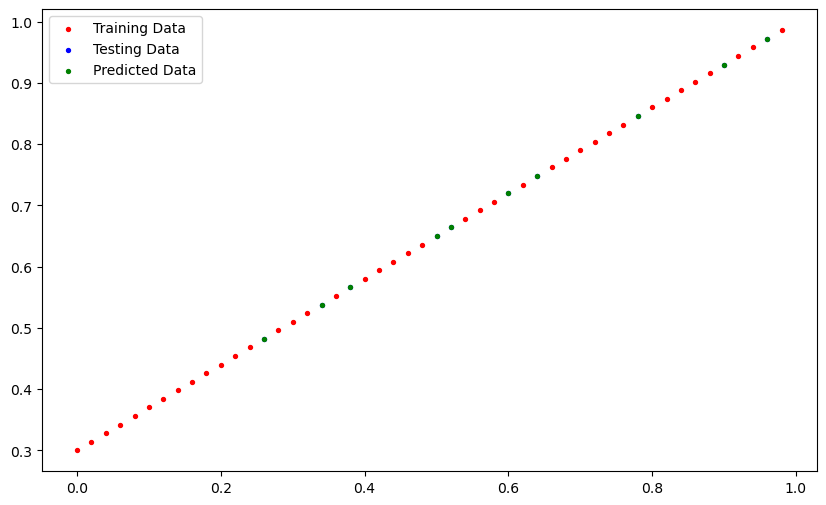

In [50]:
with torch.inference_mode():
  y_preds = model(X_test)
plot_data(X_train, Y_train, X_test, Y_test, predictions=y_preds)

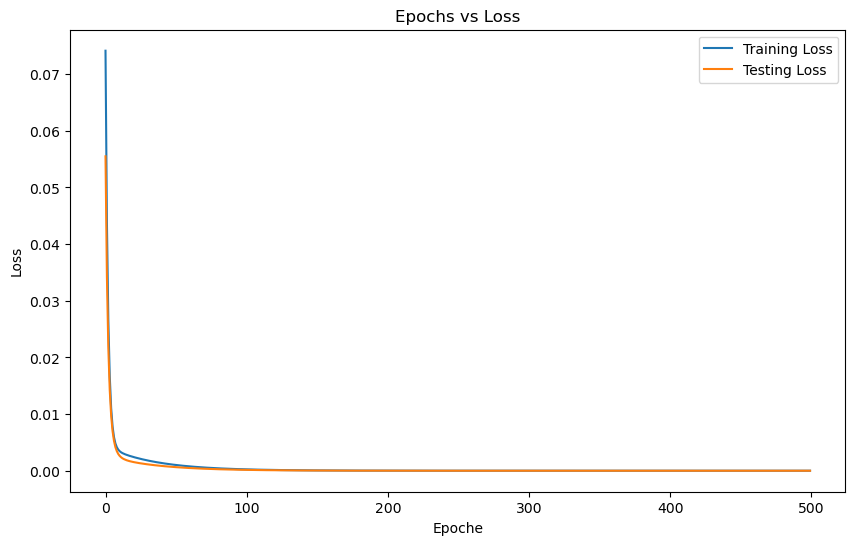

In [51]:
#Plot Loss Curves
plt.figure(figsize =(10,6))
plt.plot(range(epochs),trainLossList,label="Training Loss")
plt.plot(range(epochs),testLossList,label="Testing Loss")
plt.title("Epochs vs Loss")
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.legend();
plt.savefig('loss.png')
plt.show()